A. Charger le jeu de données nettoyé

In [3]:
import pandas as pd
df = pd.read_csv('../data/creditcard_clean.csv')

B. Analyse descriptive globale

    Taille du dataset, structure

    Statistiques de base sur toutes les variables (déjà vues, mais tu peux les récapituler ici pour la traçabilité)

    Distribution de la variable cible (fraude / non-fraude)

In [5]:
print(df.shape)
print(df.dtypes)
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True))

(284807, 31)
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


C. Visualisation de la variable cible

    Pie chart ou bar plot pour montrer le déséquilibre

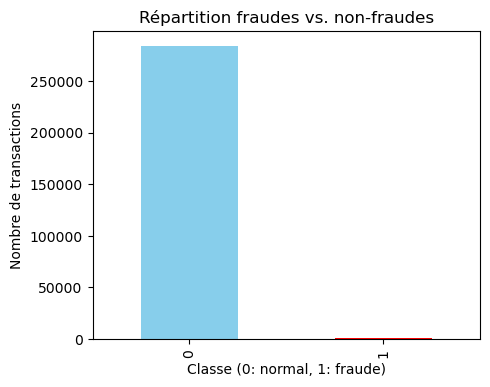

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
df['Class'].value_counts().plot(kind='bar', color=['skyblue','red'])
plt.title('Répartition fraudes vs. non-fraudes')
plt.xlabel('Classe (0: normal, 1: fraude)')
plt.ylabel('Nombre de transactions')
plt.show()

D. Analyse et visualisation de ‘Amount’

    Distribution globale

    Distribution par classe (fraude vs non-fraude)

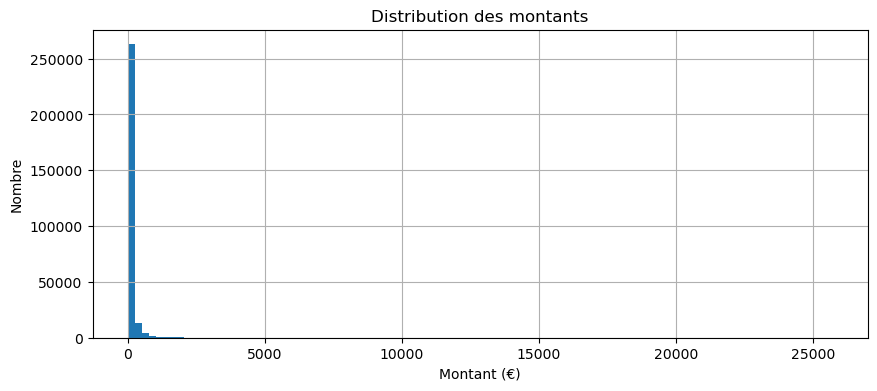

<Figure size 600x400 with 0 Axes>

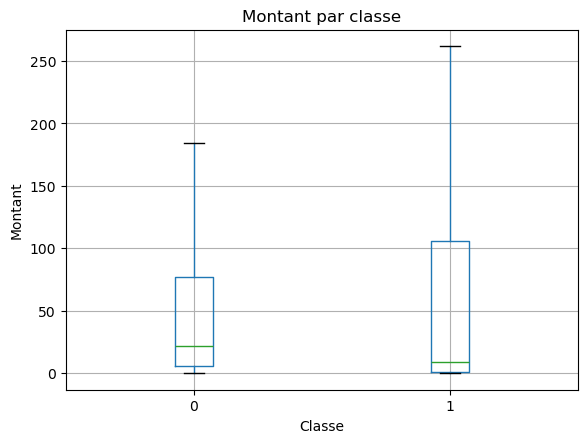

In [30]:
plt.figure(figsize=(10,4))
df['Amount'].hist(bins=100)
plt.title('Distribution des montants')
plt.xlabel('Montant (€)')
plt.ylabel('Nombre')
plt.show()

# Boxplot par classe
plt.figure(figsize=(6,4))
df.boxplot(column='Amount', by='Class', showfliers=False)
plt.title('Montant par classe')
plt.suptitle('')
plt.xlabel('Classe')
plt.ylabel('Montant')
plt.show()


E. Analyse et visualisation de ‘Time’

    Histogramme global

    Histogramme par classe (fraude/non-fraude)

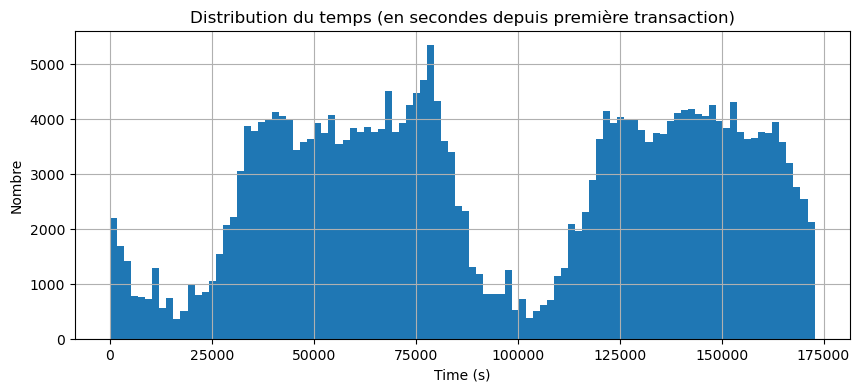

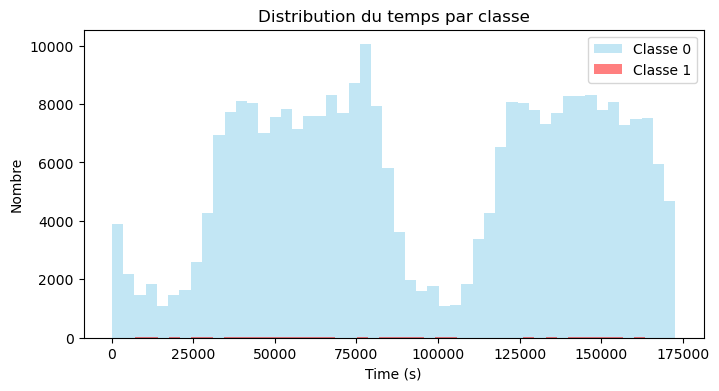

In [10]:
plt.figure(figsize=(10,4))
df['Time'].hist(bins=100)
plt.title('Distribution du temps (en secondes depuis première transaction)')
plt.xlabel('Time (s)')
plt.ylabel('Nombre')
plt.show()

plt.figure(figsize=(8,4))
for label, color in zip([0,1], ['skyblue', 'red']):
    subset = df[df['Class']==label]
    plt.hist(subset['Time'], bins=50, alpha=0.5, label=f'Classe {label}', color=color)
plt.title('Distribution du temps par classe')
plt.xlabel('Time (s)')
plt.ylabel('Nombre')
plt.legend()
plt.show()


F. Analyse des composantes principales V1–V28

    Statistiques descriptives par classe (optionnel mais utile)

    Visualisation de quelques composantes

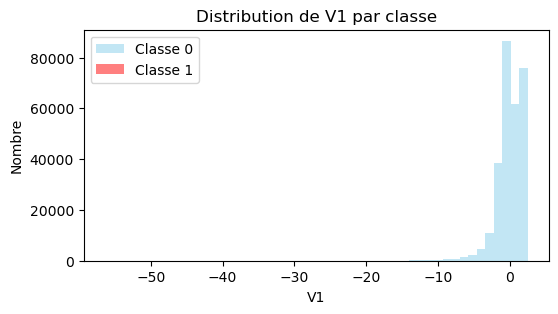

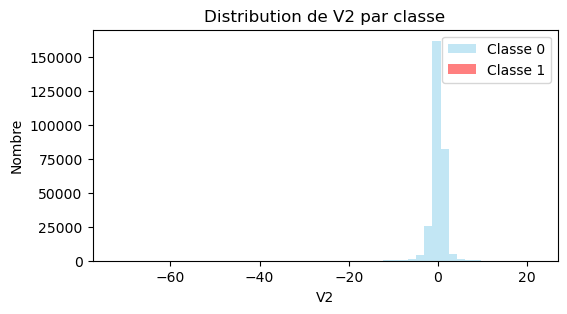

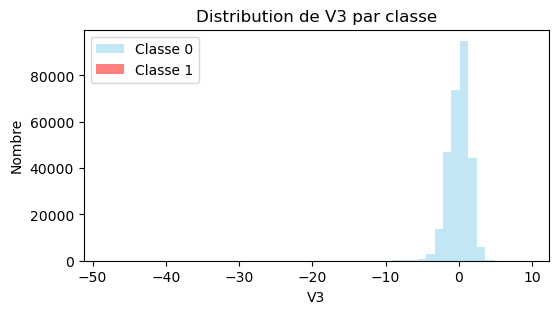

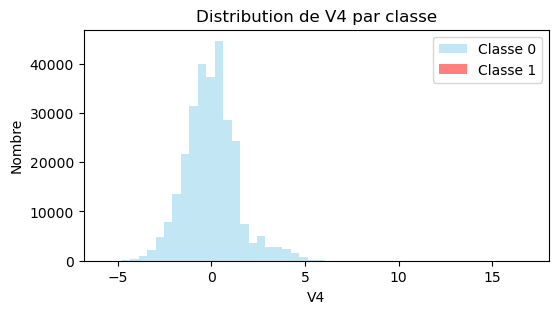

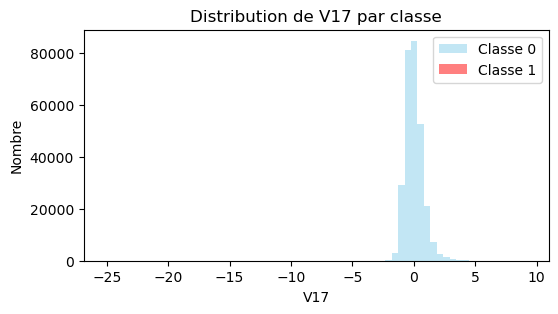

In [12]:
for col in ['V1', 'V2', 'V3', 'V4', 'V17']:
    plt.figure(figsize=(6,3))
    for label, color in zip([0,1], ['skyblue','red']):
        subset = df[df['Class']==label]
        plt.hist(subset[col], bins=50, alpha=0.5, label=f'Classe {label}', color=color)
    plt.title(f'Distribution de {col} par classe')
    plt.xlabel(col)
    plt.ylabel('Nombre')
    plt.legend()
    plt.show()

G. Corrélations

    Heatmap des corrélations (pour voir s’il y a des variables très corrélées entre elles ou avec la cible)

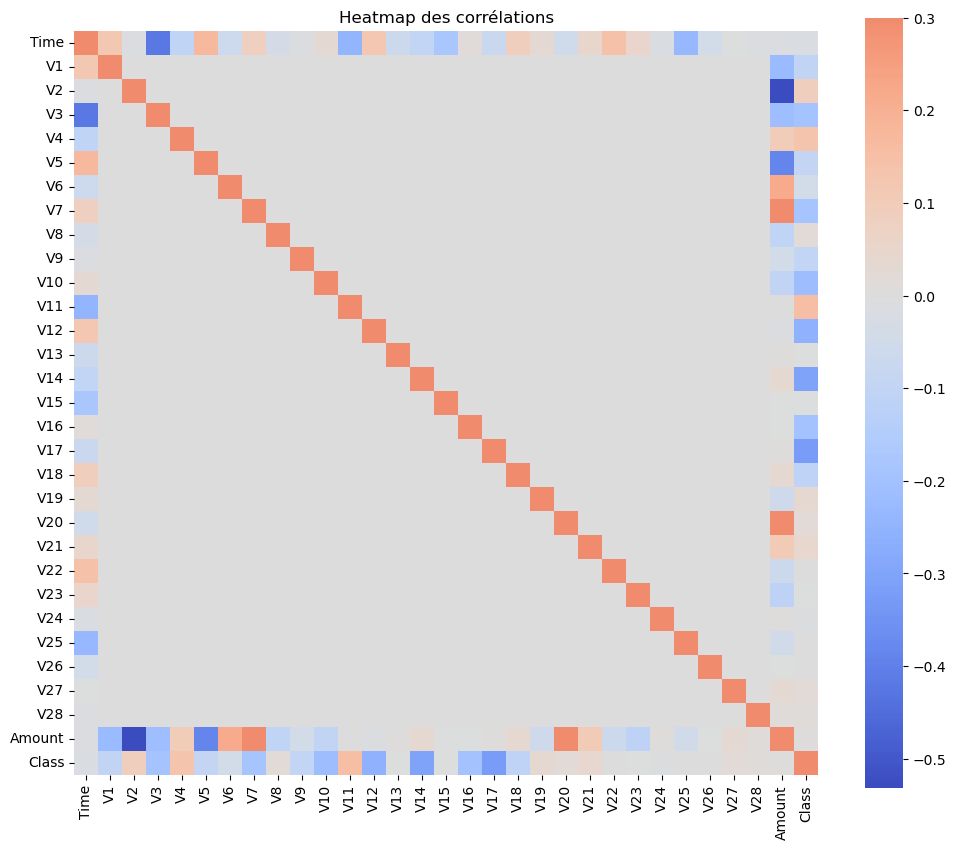

In [36]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', vmax=0.3, center=0, square=True)
plt.title('Heatmap des corrélations')
plt.show()

    Corrélation avec la cible uniquement :

In [38]:
target_corr = corr['Class'].abs().sort_values(ascending=False)
print(target_corr.head(10))

Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64
